<a href="https://colab.research.google.com/github/lilchengzi/BA820-project/blob/main/BA820_Team_Project%20Approach%202%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instacart Shopping App

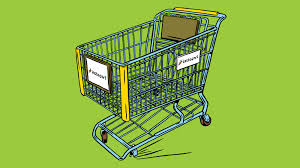

## Table of Content

>[Instacart Shopping App](#scrollTo=zj1BgXRfRNyp)

>>[Importing libraries and loading the dataset](#scrollTo=1QLA-2VL9xak)

>>[Exploring the dataset](#scrollTo=lla91x9g93lv)

>>[Exploratory Data Analysis](#scrollTo=csRGoKd-_oAa)

>>[Market Basket Analysis](#scrollTo=feKfr1AM8McP)

>>>[4.1 Data Preparation](#scrollTo=4KrUPbEujRQg)

>>>[4.2 Apriori Algorithm](#scrollTo=zCw2l4f8BuZc)

>>>[4.3 Association Rules](#scrollTo=8LO5yWeGW5A7)



## 1. Importing libraries and loading the dataset

In [ ]:
!pip install opendatasets

In [ ]:
#importing necessary libraries

import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saachidholakiabu
Your Kaggle Key: ··········


100%|██████████| 197M/197M [00:01<00:00, 114MB/s]


In [ ]:
# loading all dataframes

aisles = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/aisles.csv')
dept = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/departments.csv')
orders_prior = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/order_products__prior.csv')
orders = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/orders.csv')
prod = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/products.csv')

In [ ]:
orders_prior.shape

(32434489, 4)

Since this dataframe is too huge to work with, we will sample it to a smaller size moving forward. Given the large size of the dataframe (32,434,489 rows), it's practical to sample it to a smaller size for efficient analysis. This approach ensures manageable data exploration and facilitates meaningful inferences without overwhelming computational resources.

In [ ]:
orders_prior1 = orders_prior.sample(frac=0.01, random_state=42)
orders_prior1

,order_id,product_id,add_to_cart_order,reordered
29481110,3109255,34099,16,0
2852353,301098,41950,5,0
11194500,1181866,45066,8,0
15909397,1678630,8859,2,1
6101870,644090,24781,2,0
...,...,...,...,...
13579781,1433375,34969,5,1
22168330,2338221,10248,10,0
4041427,426460,27676,7,0
4328233,456879,38028,2,1


In [ ]:
# joining them together on common keys

df1 = pd.merge(prod, aisles, how='inner', on='aisle_id')
df2 = df1.merge(dept, how='inner', on='department_id')
df3 = df2.merge(orders_prior1, how='inner', on='product_id')
df4 = df3.merge(orders, how='inner', on='order_id')

df4
df = df4.copy()
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,prior,72,5,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,prior,20,1,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,prior,3,2,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,prior,24,2,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,prior,15,3,16,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324340,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,1954609,7,0,130601,prior,14,5,13,9.0
324341,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,prior,30,3,10,1.0
324342,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,878186,7,1,130467,prior,2,4,17,5.0
324343,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,2748395,1,0,96923,prior,4,4,10,2.0


## 2. Exploring the dataset

In [ ]:
df.eval_set.unique()

array(['prior'], dtype=object)

In [ ]:
df = df.drop('eval_set', axis=1)

Dropping the eval_set column since it holds no relevance and is merely a label for orders with only one label present.

In [ ]:
df.isna().sum()

product_id                    0
product_name                  0
aisle_id                      0
department_id                 0
aisle                         0
department                    0
order_id                      0
add_to_cart_order             0
reordered                     0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    20775
dtype: int64

Null values are only observed in the 'days_since_prior_order' column. We shall explore this further now.

In [ ]:
df[df.days_since_prior_order.isnull()]

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
15,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks,2749907,21,0,63660,1,6,17,NaN
26,449,Chips Ahoy! Chewy Cookies,61,19,cookies cakes,snacks,2283973,22,0,152748,1,0,12,NaN
43,796,Chocolate Reese's Peanut Butter Cup Creme Oreo,61,19,cookies cakes,snacks,542105,2,0,112211,1,1,17,NaN
49,1648,Chocolate Chip 1.4 oz Packs Cookies,61,19,cookies cakes,snacks,2887816,23,0,168253,1,0,16,NaN
50,26283,White Corn,83,4,fresh vegetables,produce,2887816,27,0,168253,1,0,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324252,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,1965398,2,0,50495,1,1,8,NaN
324253,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,411935,1,0,61591,1,4,15,NaN
324268,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,1924992,4,0,101510,1,6,8,NaN
324298,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,2342697,15,0,171175,1,6,13,NaN


These null values might be suggesting that no prior purchase of the product was made by the customer. We can impute it with an arbitrary float value instead so that it is in line with the datatype of the column and holds value.

In [ ]:
# imputing a value to null values of days_since_prior_order so that those rows can be used for meaningful analysis

df['days_since_prior_order'].fillna(9999.0, inplace=True) # here 9999 is our arbitrary number
df['days_since_prior_order'].isna().sum()

0

Now, we can observe that there is no null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324345 entries, 0 to 324344
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              324345 non-null  int64  
 1   product_name            324345 non-null  object 
 2   aisle_id                324345 non-null  int64  
 3   department_id           324345 non-null  int64  
 4   aisle                   324345 non-null  object 
 5   department              324345 non-null  object 
 6   order_id                324345 non-null  int64  
 7   add_to_cart_order       324345 non-null  int64  
 8   reordered               324345 non-null  int64  
 9   user_id                 324345 non-null  int64  
 10  order_number            324345 non-null  int64  
 11  order_dow               324345 non-null  int64  
 12  order_hour_of_day       324345 non-null  int64  
 13  days_since_prior_order  324345 non-null  float64
dtypes: float64(1), int64

The data types seem relevant to their respective columns.

In [ ]:
df.describe()

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,324345.000000,324345.000000,324345.000000,3.243450e+05,324345.000000,324345.000000,324345.000000,324345.000000,324345.000000,324345.000000,324345.000000
mean,25551.139194,71.198033,9.938035,1.710520e+06,8.376010,0.589536,102951.981295,17.144796,2.733216,13.428571,650.840648
std,14110.454313,38.222234,6.276621,9.869484e+05,7.158359,0.491919,59441.408028,17.502843,2.090947,4.251041,2445.515842
min,1.000000,1.000000,1.000000,4.300000e+01,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,13431.000000,31.000000,4.000000,8.559500e+05,3.000000,0.000000,51566.000000,5.000000,1.000000,10.000000,5.000000
50%,25167.000000,83.000000,9.000000,1.709853e+06,6.000000,1.000000,102527.000000,11.000000,3.000000,13.000000,8.000000
75%,37892.000000,107.000000,16.000000,2.561704e+06,11.000000,1.000000,154508.000000,24.000000,5.000000,16.000000,18.000000
max,49688.000000,134.000000,21.000000,3.421081e+06,110.000000,1.000000,206208.000000,99.000000,6.000000,23.000000,9999.000000


In [ ]:
df.describe(include='object')

,product_name,aisle,department
count,324345,324345,324345
unique,25415,134,21
top,Banana,fresh fruits,produce
freq,4754,36393,94761


Having a look at the summary statistics gives us a clearer picture of the dataset to perform further analysis.
"Banana" is the most frequent product, predominantly found in the "fresh fruits" aisle within the "produce" department. This suggests a strong demand for fresh fruits, particularly bananas, which are likely a staple item for consumers. Such insights can guide stocking strategies and promotional efforts to capitalize on popular products and categories.

In [ ]:
# converting day of the week (dow) of order from numerical to weekday name

# Define a mapping dictionary
dow_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Use the map function to apply the mapping
df['order_dow'] = df['order_dow'].map(dow_mapping)
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,72,Friday,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,20,Monday,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,3,Tuesday,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,24,Tuesday,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,15,Wednesday,16,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324340,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,1954609,7,0,130601,14,Friday,13,9.0
324341,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,30,Wednesday,10,1.0
324342,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,878186,7,1,130467,2,Thursday,17,5.0
324343,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,2748395,1,0,96923,4,Thursday,10,2.0


The dataset provides information on product sales, highlighting consumer preferences, shopping patterns, and product popularity. By analyzing reorder rates, shopping frequency, and trends in purchase times, we can infer consumer behavior and make informed decisions regarding product placement and inventory management.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324345 entries, 0 to 324344
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              324345 non-null  int64  
 1   product_name            324345 non-null  object 
 2   aisle_id                324345 non-null  int64  
 3   department_id           324345 non-null  int64  
 4   aisle                   324345 non-null  object 
 5   department              324345 non-null  object 
 6   order_id                324345 non-null  int64  
 7   add_to_cart_order       324345 non-null  int64  
 8   reordered               324345 non-null  int64  
 9   user_id                 324345 non-null  int64  
 10  order_number            324345 non-null  int64  
 11  order_dow               324345 non-null  object 
 12  order_hour_of_day       324345 non-null  int64  
 13  days_since_prior_order  324345 non-null  float64
dtypes: float64(1), int64

## 3. Exploratory Data Analysis

Performing various exploratory data analyses to get to know the data better.

In [ ]:
# number of unique products in each aisle

df.groupby('aisle').product_id.nunique()

aisle
air fresheners candles           113
asian foods                      320
baby accessories                  12
baby bath body care               50
baby food formula                441
                                ... 
trash bags liners                 65
vitamins supplements             244
water seltzer sparkling water    239
white wines                       63
yogurt                           741
Name: product_id, Length: 134, dtype: int64

In [ ]:
# number of unique products in each departments

df.groupby('department').product_id.nunique()

department
alcohol             398
babies              586
bakery              973
beverages          2425
breakfast           682
bulk                 28
canned goods       1158
dairy eggs         2377
deli                809
dry goods pasta    1030
frozen             2413
household          1398
international       538
meat seafood        539
missing             252
other               166
pantry             2570
personal care      1984
pets                406
produce            1227
snacks             3456
Name: product_id, dtype: int64

In [ ]:
# order id with the biggest order

max_order = df.add_to_cart_order.max()
df[df.add_to_cart_order==max_order].loc[:,['order_id', 'user_id']]

,order_id,user_id
29349,3308010,129928


In [ ]:
# top customers based on purchase quantity

top_cust = df.groupby('user_id').order_id.count().reset_index()
top_cust.sort_values('order_id', ascending = False).head(10)

,user_id,order_id
115796,201268,44
79220,137629,43
80839,140440,37
62530,108187,37
104955,182401,36
41684,72136,35
19369,33731,33
101577,176478,32
94457,164055,32
58010,100330,31


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

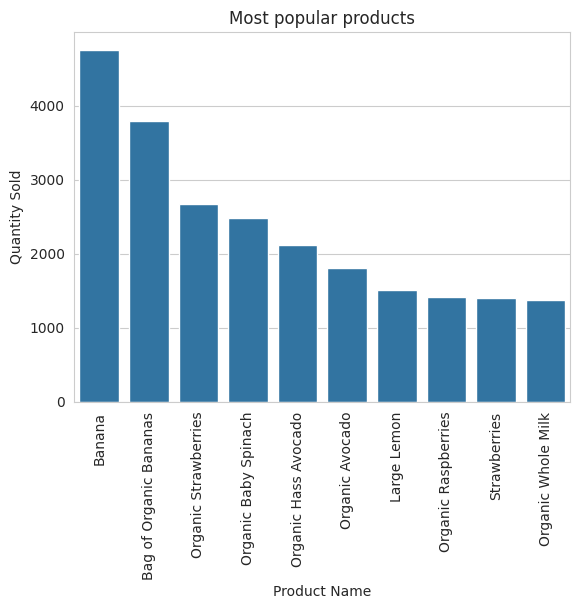

In [ ]:
# most popular products based on purchases

top_prod = df.product_name.value_counts().reset_index()
top_prod = top_prod.sort_values('product_name', ascending = False).head(10)

sns.barplot(data=top_prod, x='index', y='product_name')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.title('Most popular products')
plt.xticks(rotation=90)
plt.show()

From the visual representation, we can infer the following:

* Bananas are the most popular product by a significant margin, followed by a bag of organic bananas.
* Organic strawberries, organic baby spinach, and organic Hass avocado are moderately popular and have relatively similar quantities sold.
* The remaining products, including organic lemon, large lemon, organic raspberries, strawberries, and organic whole milk, have lower sales compared to the top products but are still among the top 10.
* There is a gradual decrease in the quantity sold from bananas to organic whole milk, indicating that the popularity of products decreases from left to right on the chart.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


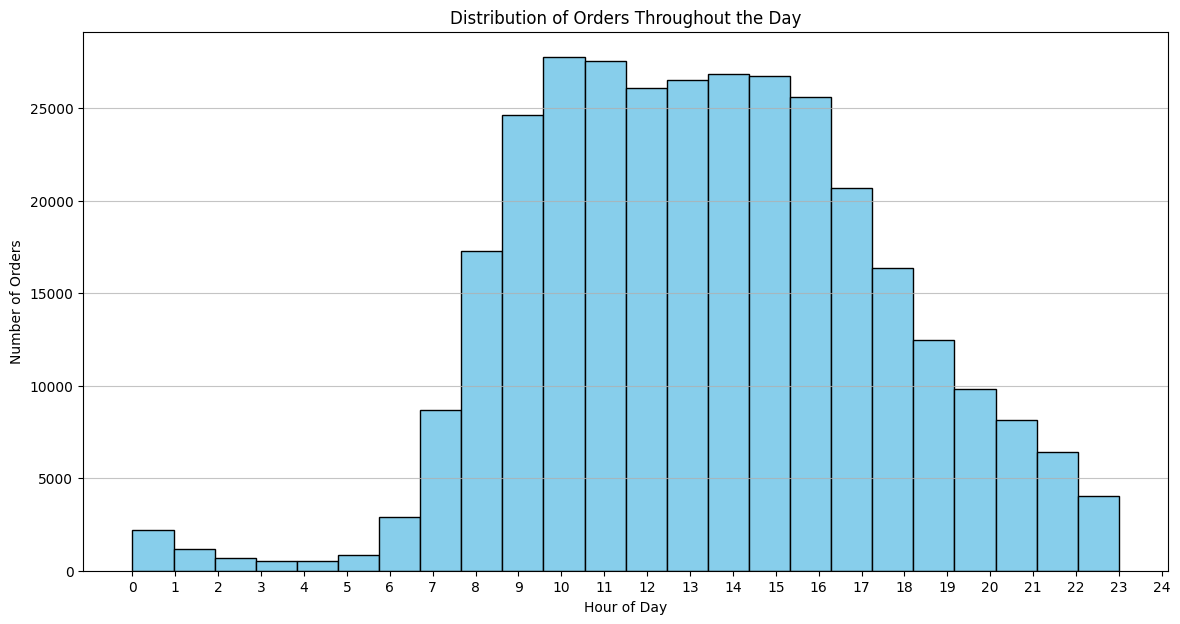

In [ ]:
import matplotlib.pyplot as plt

# Plotting the histogram of the order_hour_of_day
plt.figure(figsize=(14, 7))
plt.hist(df['order_hour_of_day'], bins=24, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 25))
plt.grid(axis='y', alpha=0.75)
plt.show()

From the above graph we can  infer the following about the distribution of orders:

* Lowest Activity in Early Hours: There is very low order activity in the early hours of the day, from midnight (0) to 6 AM, which is typical as these are non-peak hours for shopping activities.
* Gradual Increase in Morning: Starting from 6 AM, there is a gradual increase in the number of orders, which suggests that people begin placing orders as the day starts, with a more noticeable rise around 7 AM to 8 AM, possibly as more people wake up and start their day.

* Peak Hours: The peak hours for orders are from 9 AM to 5 PM, with the highest number of orders occurring around 10 AM to 3 PM. This indicates that the majority of orders are placed during the late morning to mid-afternoon hours, which might correspond with common meal preparation times or typical breaks in a workday.

* Evening Decrease: After 5 PM, there is a gradual decline in the number of orders, although there is still a relatively high level of activity until about 7 PM. This could reflect that people are less likely to place orders as they are returning from work or engaging in evening activities.

* Significant Drop at Night: Post 7 PM, there is a more pronounced drop, with a steep decrease after 8 PM. This suggests that by late evening, the frequency of orders diminishes significantly as it approaches midnight.

* Midnight Activity: There is a slight increase in orders just before midnight, which could be attributed to last-minute orders placed before the day ends or promotional activities that end at midnight.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


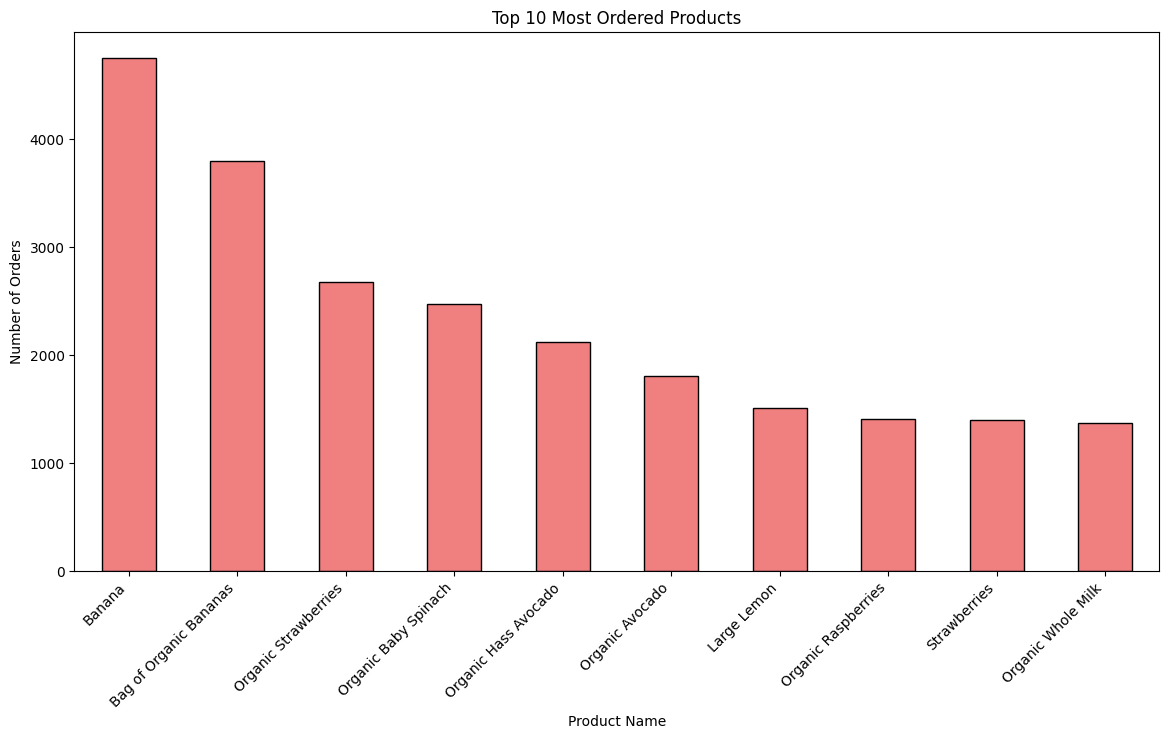

In [ ]:
# Calculate the count of orders per product
top_products = df['product_name'].value_counts().head(10)

# Plotting the bar chart for the top 10 most ordered products
plt.figure(figsize=(14, 7))
top_products.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')

plt.show()

The inferences that can be made about consumer purchasing behavior:

* Popularity of Produce: The chart shows a strong preference for fresh produce among the top ordered products. Bananas and organic bananas are the most ordered items, which suggests that these fruits are staples in many households.

* Organic Preference: There is a notable trend towards organic products. Aside from bananas, other organic items like organic strawberries, organic baby spinach, organic Hass avocado, and organic whole milk are among the most ordered. This indicates a consumer preference for organic options, which may be due to health, taste, or environmental concerns.

* Variety in Fruits: A variety of fruits are represented in the top orders, including bananas, strawberries, and avocados. This variety indicates that customers are purchasing a diverse selection of fruits, which might be used for different purposes such as snacking, cooking, or as ingredients in recipes.

* Health-Conscious Choices: The presence of baby spinach and organic items suggests that health-conscious choices are prominent among the top orders. Customers seem to be prioritizing items that are associated with a healthy lifestyle.

* Consistency in Ordering: The fact that these items are the most ordered products could also imply that they are consistently purchased on a regular basis, rather than being one-time purchases. This might be due to their role as essential items in many households.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
<ipython-input-37-eea39da8059a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reordered', data=df, ax=axes[0, 1], palette

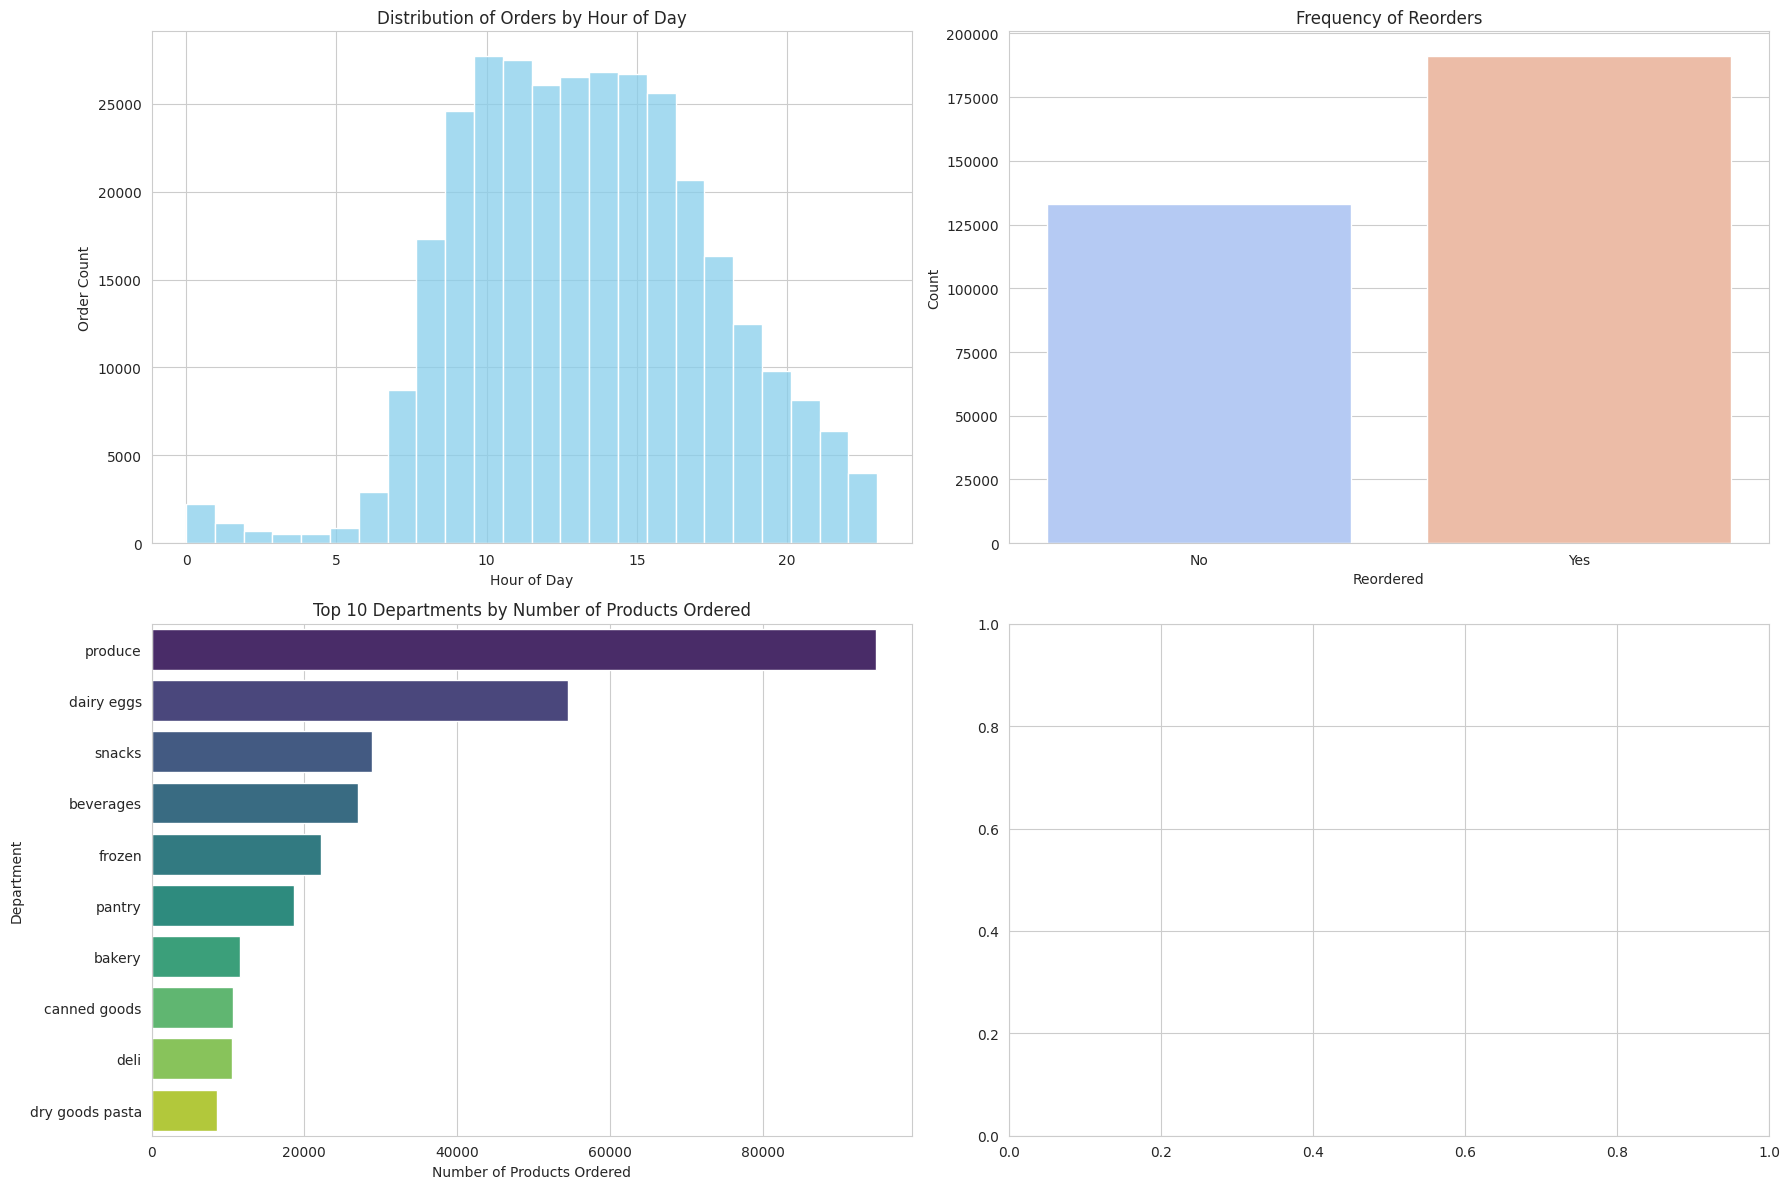

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Distribution of Orders by Hour of Day
sns.histplot(df['order_hour_of_day'], bins=24, kde=False, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Orders by Hour of Day')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Order Count')

# Plot 2: Frequency of Reorders
sns.countplot(x='reordered', data=df, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Frequency of Reorders')
axes[0, 1].set_xlabel('Reordered')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(['No', 'Yes'])

# Plot 3: Number of Products Ordered from Each Department (Top 10)
top_departments = df['department'].value_counts().head(10)
sns.barplot(y=top_departments.index, x=top_departments.values, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Top 10 Departments by Number of Products Ordered')
axes[1, 0].set_xlabel('Number of Products Ordered')
axes[1, 0].set_ylabel('Department')

plt.tight_layout()
plt.show()

Here's an interpretation for the above plots:

* Distribution of Orders by Hour of Day: The histogram shows the distribution of orders throughout the day. There's a notable increase in orders starting from the morning, peaking around the midday hours, and then gradually decreasing as the day progresses. The peak hours for orders are between 10 AM and 4 PM, which might suggest that this time window is when most people prefer to have their deliveries scheduled or when they are most likely to place orders.
* Frequency of Reorders: The count plot indicates that a larger number of products are reordered rather than being ordered for the first time. This could suggest a high level of customer retention and satisfaction with the products, as they are willing to purchase them again. It may also indicate that the service is used for regular, repeat purchases of staple items.
* Top 10 Departments by Number of Products Ordered: The horizontal bar chart displays the top 10 departments based on the number of products ordered from each. The 'produce' department leads by a significant margin, suggesting that fresh fruits and vegetables are the most popular items among customers. This is followed by 'dairy eggs', 'snacks', and 'beverages', indicating that these are also commonly ordered categories. Departments like 'bakery', 'canned goods', 'deli', and 'dry goods pasta' have fewer orders in comparison, but still make it to the top 10, which could imply a well-rounded demand across different food categories.

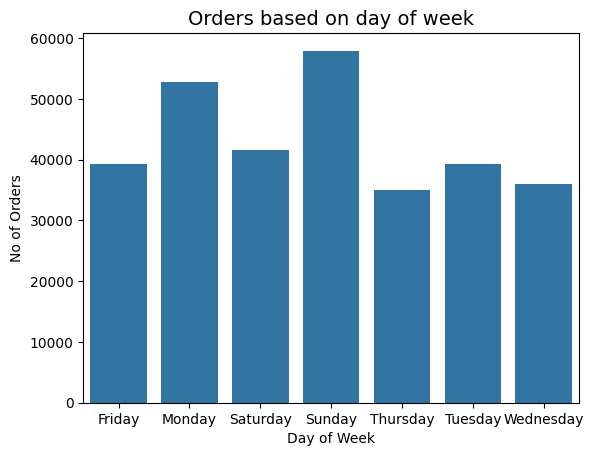

In [ ]:
# what day do most orders take place

dow = df.groupby('order_dow').order_id.nunique().reset_index()

sns.barplot(data=dow, x='order_dow', y='order_id');
plt.title('Orders based on day of week', fontsize = 14)
plt.xlabel('Day of Week')
plt.ylabel('No of Orders')
plt.show()

Day of the Week Ordering Trend: From the graph, it is evident that the highest number of orders are placed on Sunday, followed by Monday. The other days of the week exhibit a relatively lower and more uniform number of orders.

In [ ]:
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,72,Friday,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,20,Monday,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,3,Tuesday,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,24,Tuesday,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,15,Wednesday,16,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324340,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,1954609,7,0,130601,14,Friday,13,9.0
324341,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,30,Wednesday,10,1.0
324342,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,878186,7,1,130467,2,Thursday,17,5.0
324343,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,2748395,1,0,96923,4,Thursday,10,2.0


## 4. Market Basket Analysis

APPROACH -2

###4.1 Data Preparation

In [ ]:
# importing necessary libraries

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
mba = orders_prior[['order_id', 'product_id']].merge(prod[['product_id', 'product_name']], how='inner', on='product_id')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_mba1 = mba.groupby('order_id')['product_name'].apply(','.join).reset_index()
df_mba1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_name
0,2,"Organic Egg Whites,Michigan Organic Kale,Garli..."
1,3,Total 2% with Strawberry Lowfat Greek Strained...
2,4,"Plain Pre-Sliced Bagels,Honey/Lemon Cough Drop..."
3,5,"Bag of Organic Bananas,Just Crisp, Parmesan,Fr..."
4,6,"Cleanse,Dryer Sheets Geranium Scent,Clean Day ..."
...,...,...
3214869,3421079,Moisture Soap
3214870,3421080,"Organic Cilantro,Organic Whole Milk,Organic To..."
3214871,3421081,"Lime Sparkling Water,Classic Wheat Bread,Dijon..."
3214872,3421082,"Raspberries,Strawberries,Toasted Coconut Chips..."


The output dataframe df_mba1 contains the order ID and a comma-separated list of product names associated with each order. This format is suitable for market basket analysis, as it provides a clear view of the products purchased together within each order. By analyzing these product combinations, patterns such as frequently co-purchased items or associations between specific products can be identified. This insight can inform strategies for product placement, promotions, and recommendations to enhance the customer shopping experience and increase sales.

In [ ]:
df_mba1 = df_mba1.sample(frac=0.01, random_state=42)
df_mba1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_name
1454590,1548381,Unsweetened Chocolate Almond Breeze Almond Mil...
1456155,1550066,"Cherubs Heavenly Salad Tomatoes,Organic Reduce..."
599356,638197,"Carrots,Organic Baby Spinach,Yellow Onions,Org..."
2969472,3160070,"Sea Salt Pita Chips,Original Hummus,Organic Ba..."
2442544,2599408,"Canned Aranciata Orange,Oats & Honey Gluten Fr..."
...,...,...
943039,1003981,Draught Beer
1359263,1446947,"Unsweetened Almondmilk,Organic Raspberries,Org..."
3088614,3286731,"Smartwater Electrolyte Enhanced Water,Pinot No..."
509730,542712,"Organic Strawberries,Water,Pasta Joy Ready Org..."


By sampling the dataframe df_mba1 with a fraction of 0.01 (1%), we obtain a subset of the data for analysis while maintaining its representative nature. This reduced dataset size is more manageable for further processing and can still provide valuable insights into market basket analysis. Sampling helps mitigate computational complexity while preserving the key patterns and associations present in the original data.

In [ ]:
# data preparation
data_column = df_mba1.loc[:, 'product_name']
data = list(data_column.apply(lambda x: x.split(',')))
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Unsweetened Chocolate Almond Breeze Almond Milk',
  'Spring Water',
  'Just Green Unsweetened Tea',
  'Cream Top Smooth & Creamy Vanilla Yogurt',
  'Cream Top Peach on the Bottom Yogurt',
  'Broth Free Range Chicken Organic'],
 ['Cherubs Heavenly Salad Tomatoes',
  'Organic Reduced Fat Milk',
  'Organic Peeled Whole Baby Carrots',
  'Baby Seedless Cucumbers',
  'Large Grapefruit',
  'Organic Italian Salad',
  'Whipped Cream Cheese',
  'Dha Omega 3 Reduced Fat 2% Milk',
  'Organic Black Mission Figs',
  'Apple Apricot Sauce',
  'Organic Turkey Hot Dogs',
  'Chocolate Crepes',
  'Lowfat 2% Milkfat Russian Yogurt'],
 ['Carrots',
  'Organic Baby Spinach',
  'Yellow Onions',
  'Organic Heavy Whipping Cream',
  'Gluten Free Mushroom Risotto Bowl',
  'Organic Fresh Basil',
  'Shredded Parmesan',
  'Marinara Sauce',
  'Russet Potato',
  'Shredded Mozzarella',
  'Organic Italian Parsley Bunch',
  'Premium Pure Cane Granulated Sugar',
  'Half & Half',
  'Broccoli & Cheddar Bake Meal Bowl',
  

###4.2 Apriori Algorithm

In [ ]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)

# Create a dataframe from the data
df_encoded = pd.DataFrame(te_data, columns=te.columns_)
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,Apricot & Banana Stage 2 Baby Food,Instant,& Baby Wipes,& Cheese Biscuit,& Cheese Croissant,& Cheese English Muffin,& Cheese Sandwiches,& Cheese Sauce,& Coconut With Red Lentils Organic Baby Food,...,with Olive Oil Mayonnaise Dressing,with Seasoned Roasted Potatoes Scrambled Eggs & Sausage,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Pineapple Coconut Water,Lightly Seasoned with Rosemary and Roasted Garlic Family Size Herb Chicken Tortellini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32144,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The dataset has been successfully transformed into a binary transaction dataset suitable for market basket analysis using the Apriori Algorithm.
Each transaction is represented as a row, with columns indicating the presence or absence of each item.
This binary representation enables the identification of frequent itemsets and association rules among the items purchased together in transactions.

In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.013717,( Bag)
1,0.014930,( Bunch)
2,0.022178,( Organic)
3,0.011042,( Strawberry)
4,0.011167,(100% Raw Coconut Water)
...,...,...
118,0.012598,"(Banana, Strawberries)"
119,0.010420,"(Organic Hass Avocado, Organic Baby Spinach)"
120,0.011384,"(Organic Baby Spinach, Organic Strawberries)"
121,0.013157,"(Organic Hass Avocado, Organic Strawberries)"


The Apriori algorithm identified frequent itemsets from the transaction data, revealing prevalent patterns of item co-occurrence. Notably, individual items like 'Bag', 'Bunch', 'Organic', 'Strawberry', and '100% Raw Coconut Water' are commonly purchased. Additionally, specific item combinations such as ('Banana', 'Strawberries') and ('Organic Hass Avocado', 'Organic Baby Spinach') are frequently found together in transactions. These insights enable retailers to understand customer preferences and behavior, facilitating targeted marketing campaigns, personalized recommendations, and optimized product placements to enhance the shopping experience and increase sales.







###4.3 Association Rules

In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
rules.sort_values(by="support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Organic Hass Avocado),(Bag of Organic Bananas),0.067249,0.121466,0.019503,0.290009,2.387582,0.011334,1.237388,0.623067
4,(Bag of Organic Bananas),(Organic Hass Avocado),0.121466,0.067249,0.019503,0.160563,2.387582,0.011334,1.111163,0.661518
9,(Organic Strawberries),(Bag of Organic Bananas),0.082615,0.121466,0.018134,0.219503,1.807120,0.008099,1.125609,0.486855
8,(Bag of Organic Bananas),(Organic Strawberries),0.121466,0.082615,0.018134,0.149296,1.807120,0.008099,1.078383,0.508384
18,(Organic Strawberries),(Banana),0.082615,0.144732,0.017326,0.209714,1.448977,0.005368,1.082225,0.337762
19,(Banana),(Organic Strawberries),0.144732,0.082615,0.017326,0.119708,1.448977,0.005368,1.042136,0.362294
14,(Organic Baby Spinach),(Banana),0.073626,0.144732,0.015615,0.212083,1.465345,0.004959,1.085479,0.342806
15,(Banana),(Organic Baby Spinach),0.144732,0.073626,0.015615,0.107887,1.465345,0.004959,1.038405,0.371307
12,(Organic Avocado),(Banana),0.053625,0.144732,0.015490,0.288863,1.995844,0.007729,1.202677,0.527232
13,(Banana),(Organic Avocado),0.144732,0.053625,0.015490,0.107028,1.995844,0.007729,1.059803,0.583395


Notable associations include pairs like 'Organic Hass Avocado' and 'Bag of Organic Bananas', 'Organic Strawberries' and 'Bag of Organic Bananas', and 'Organic Strawberries' and 'Banana'. These associations are characterized by high support values, indicating their frequent occurrence, and significant lift values, suggesting strong associations beyond what would be expected by chance. For instance, 'Organic Hass Avocado' and 'Bag of Organic Bananas' have a lift of 2.39, indicating a 2.39 times higher likelihood of being purchased together compared to if their sales were independent. These insights provide actionable information for retailers to optimize product placement, promotions, and assortment strategies to enhance customer experience and drive sales.